In [18]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

plt.rc('font', family='sans-serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
savepath = "/Users/saadjansari/Desktop/Meetings/Flatiron/Flatiron 200931"
plt.close('all')

In [19]:
dt = 0.05
main_dir = "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf_const_num"
finfo = [
    "run_1/pf01_d10", 1.0, 1.0,
    "run/pf01_d125",  1.0, 1.25,
    "run_1/pf01_d15", 1.0, 1.5,
    "run/pf01_d175",  1.0, 1.75,
    "run_1/pf01_d20", 1.0, 2.0,
    "run/pf01_d225",  1.0, 2.25,
    "run_1/pf01_d25", 1.0, 2.5,
    "run/pf01_d275",  1.0, 2.75,
    "run_1/pf01_d30", 1.0, 3.0,
    
    "run_1/pf02_d10", 2.0, 1.0,
    "run/pf02_d125",  2.0, 1.25,
    "run_1/pf02_d15", 2.0, 1.5,
    "run/pf02_d175",  2.0, 1.75,
    "run_1/pf02_d20", 2.0, 2.0,
    "run/pf02_d225",  2.0, 2.25,
    "run_1/pf02_d25", 2.0, 2.5,
    "run/pf02_d275",  2.0, 2.75,
    "run_1/pf02_d30", 2.0, 3.0,

    "run_1/pf04_d10", 4.0, 1.0,
    "run/pf04_d125",  4.0, 1.25,
    "run_1/pf04_d15", 4.0, 1.5,
    "run/pf04_d175",  4.0, 1.75,
    "run_1/pf04_d20", 4.0, 2.0,
    "run/pf04_d225",  4.0, 2.25,
    "run_1/pf04_d25", 4.0, 2.5,
    "run/pf04_d275",  4.0, 2.75,
    "run_1/pf04_d30", 4.0, 3.0,
    
    "run_1/pf08_d10", 8.0, 1.0,
    "run/pf08_d125",  8.0, 1.25,
    "run_1/pf08_d15", 8.0, 1.5,
    "run/pf08_d175",  8.0, 1.75,
    "run_1/pf08_d20", 8.0, 2.0,
    "run/pf08_d225",  8.0, 2.25,
    "run_1/pf08_d25", 8.0, 2.5,
    "run/pf08_d275",  8.0, 2.75,
    "run_1/pf08_d30", 8.0, 3.0,
    
    "run_2/pf12_d10", 12.0, 1.0,
    "run/pf12_d125",  12.0, 1.25,
    "run_2/pf12_d15", 12.0, 1.5,
    "run/pf12_d175",  12.0, 1.75,
    "run_2/pf12_d20", 12.0, 2.0,
    "run/pf12_d225",  12.0, 2.25,
    "run_2/pf12_d25", 12.0, 2.5,
    "run/pf12_d275",  12.0, 2.75,
    "run_2/pf12_d30", 12.0, 3.0,
    
    "run_1/pf16_d10", 16.0, 1.0,
    "run/pf16_d125",  16.0, 1.25,
    "run_1/pf16_d15", 16.0, 1.5,
    "run/pf16_d175",  16.0, 1.75,
    "run_1/pf16_d20", 16.0, 2.0,
    "run/pf16_d225",  16.0, 2.25,
    "run_1/pf16_d25", 16.0, 2.5,
    "run/pf16_d275",  16.0, 2.75,
    "run_1/pf16_d30", 16.0, 3.0,
    
    "run_2/pf20_d10", 20.0, 1.0,
    "run/pf20_d125",  20.0, 1.25,
    "run_2/pf20_d15", 20.0, 1.5,
    "run/pf20_d175",  20.0, 1.75,
    "run_2/pf20_d20", 20.0, 2.0,
    "run/pf20_d225",  20.0, 2.25,
    "run_2/pf20_d25", 20.0, 2.5,
    "run/pf20_d275",  20.0, 2.75,
    "run_2/pf20_d30", 20.0, 3.0,
]

diction = {
    'path': [os.path.join(main_dir,ii,'s0') for ii in finfo[0::3] ],
    'packing_fraction': np.array(finfo[1::3])/1.0,
    'confining_diameter': np.array(finfo[2::3])
}
# labels
labs = []
for idx in range( len(diction['path'])):
    labs += ['pf = {0}%, d = {1}'.format(diction['packing_fraction'][idx], diction['confining_diameter'][idx])]
diction['labels'] = labs

df = pd.DataFrame(data=diction)
df.head()

,path,packing_fraction,confining_diameter,labels
0,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.00,"pf = 1.0%, d = 1.0"
1,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.25,"pf = 1.0%, d = 1.25"
2,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.50,"pf = 1.0%, d = 1.5"
3,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.75,"pf = 1.0%, d = 1.75"
4,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,2.00,"pf = 1.0%, d = 2.0"


In [23]:
S_c = np.zeros( len(df.index))
Serr_c = np.zeros( len(df.index))
S_b = np.zeros( len(df.index))
Serr_b = np.zeros( len(df.index))

# P0_c = np.zeros( len(df.index))
# P0err_c = np.zeros( len(df.index))
# P1_c = np.zeros( len(df.index))
# P1err_c = np.zeros( len(df.index))

# P0_b = np.zeros( len(df.index))
# P0err_b = np.zeros( len(df.index))
# P1_b = np.zeros( len(df.index))
# P1err_b = np.zeros( len(df.index))

zorder = np.zeros( len(df.index))
zorder_err = np.zeros( len(df.index))

for idx in range( len(df.index)):
    
    fpath = df.path[idx]
    dat = pd.read_feather( os.path.join(fpath, 'df.ftr'))
    
    st_pt = len(dat.index) - int(np.ceil(2/dt))
    
    # Nematic order
    S_c[idx] = np.mean( dat['S_cluster'][st_pt::])
    Serr_c[idx] = np.std( dat['S_cluster'][st_pt::])
    S_b[idx] = np.mean( dat['S_bulk'][st_pt::])
    Serr_b[idx] = np.std( dat['S_bulk'][st_pt::])
    
    # Z-order
    zorder[idx] = np.mean( dat['z_order'][st_pt::])
    zorder_err[idx] = np.std( dat['z_order'][st_pt::])
    
#     # Local polar order (parallel = 0, antiparallel = 1)
#     P0_c[idx] = np.mean( dat['P_local_cluster_par'][0,st_pt::])
#     P0err_c[idx] = np.mean( dat['P_local_cluster_par'][1,st_pt::])
#     P1_c[idx] = np.mean( dat['P_local_cluster_apar'][0,st_pt::])
#     P1err_c[idx] = np.mean( dat['P_local_cluster_apar'][1,st_pt::])
    
#     P0_b[idx] = np.mean( dat['P_local_bulk_par'][0,st_pt::])
#     P0err_b[idx] = np.mean( dat['P_local_bulk_par'][1,st_pt::])
#     P1_b[idx] = np.mean( dat['P_local_bulk_apar'][0,st_pt::])
#     P1err_b[idx] = np.mean( dat['P_local_bulk_apar'][1,st_pt::])
    
df['S_cluster'] = S_c
df['Serr_cluster'] = Serr_c
df['S_bulk'] = S_b
df['Serr_bulk'] = Serr_b
# df['P_bulk_parallel'] = P0_b
# df['P_bulk_aparallel'] = P1_b
# df['Perr_bulk_parallel'] = P0err_b
# df['Pee_bulk_aparallel'] = P1err_b
# df['P_cluster_parallel'] = P0_c
# df['P_cluster_aparallel'] = P1_c
# df['Perr_cluster_parallel'] = P0err_c
# df['Perr_cluster_aparallel'] = P1err_c
df['z_order'] = zorder
df['z_order_err'] = zorder_err

df.head()

,path,packing_fraction,confining_diameter,labels,S_cluster,Serr_cluster,S_bulk,Serr_bulk,z_order,z_order_err
0,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.00,"pf = 1.0%, d = 1.0",0.846587,0.044365,0.788310,0.036076,0.920277,0.014747
1,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.25,"pf = 1.0%, d = 1.25",0.662159,0.088121,0.571968,0.070430,0.820197,0.035639
2,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.50,"pf = 1.0%, d = 1.5",0.488458,0.084765,0.438929,0.067673,0.735084,0.044290
3,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.75,"pf = 1.0%, d = 1.75",0.369353,0.062744,0.338168,0.062840,0.667568,0.049626
4,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,2.00,"pf = 1.0%, d = 2.0",0.316756,0.085661,0.260771,0.066592,0.632401,0.045311


### Nematic order:

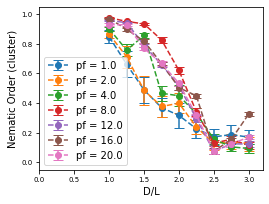

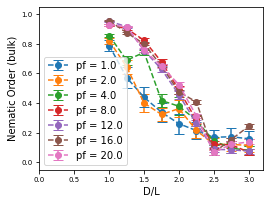

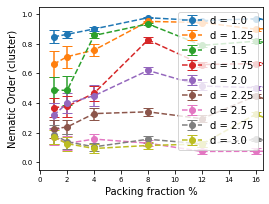

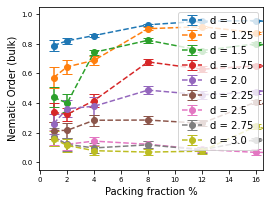

In [30]:
pf_list = df.packing_fraction.unique()
d_list = df.confining_diameter.unique()

# Confining diameter (Cluster and Bulk)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(pf_list)):
    # Get sims with just these packing fractions
    df1 = df[ df['packing_fraction'] == pf_list[idx] ]
    lab = 'pf = {0}'.format( df1.packing_fraction.tolist()[0] )
    ax.errorbar(df1.confining_diameter, df1.S_cluster, yerr=df1.Serr_cluster, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('D/L')
ax.set_ylabel('Nematic Order (cluster)')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[-0, 3.2])
plt.savefig(os.path.join(savepath, "Scluster_vs_diameter.pdf"))

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(pf_list)):
    # Get sims with just these packing fractions
    df1 = df[ df['packing_fraction'] == pf_list[idx] ]
    lab = 'pf = {0}'.format( df1.packing_fraction.tolist()[0] )
    ax.errorbar(df1.confining_diameter, df1.S_bulk, yerr=df1.Serr_bulk, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('D/L')
ax.set_ylabel('Nematic Order (bulk)')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[-0, 3.2])
plt.savefig(os.path.join(savepath, "Sbulk_vs_diameter.pdf"))

# Packing fraction (Cluster and Bulk)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(d_list)):
    
    # Get sims with just these confining diameters
    df1 = df[ df['confining_diameter'] == d_list[idx] ]
    lab = 'd = {0}'.format( df1.confining_diameter.tolist()[0] )
    ax.errorbar(df1.packing_fraction, df1.S_cluster, yerr=df1.Serr_cluster, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('Packing fraction %')
ax.set_ylabel('Nematic Order (cluster)')
plt.legend(loc=1)
ax.set(ylim=[-0.05,1.05], xlim=[-0.05, 16.5])
plt.savefig(os.path.join(savepath, "Scluster_vs_pf.pdf"))


fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(d_list)):
    
    # Get sims with just these confining diameters
    df1 = df[ df['confining_diameter'] == d_list[idx] ]
    lab = 'd = {0}'.format( df1.confining_diameter.tolist()[0] )
    ax.errorbar(df1.packing_fraction, df1.S_bulk, yerr=df1.Serr_bulk, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('Packing fraction %')
ax.set_ylabel('Nematic Order (bulk)')
plt.legend(loc=1)
ax.set(ylim=[-0.05,1.05], xlim=[-0.05, 16.5])
plt.savefig(os.path.join(savepath, "Sbulk_vs_pf.pdf"))

### Local Polar Order:

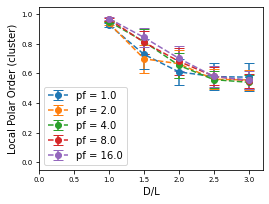

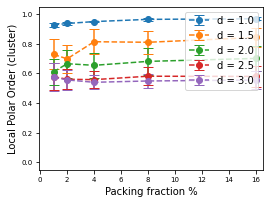

In [18]:
pf_list = df.packing_fraction.unique()
d_list = df.confining_diameter.unique()

# Confining diameter (Cluster)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(pf_list)):
    # Get sims with just these packing fractions
    df1 = df[ df['packing_fraction'] == pf_list[idx] ]
    lab = 'pf = {0}'.format( df1.packing_fraction.tolist()[0] )
    ax.errorbar(df1.confining_diameter, df1.P_cluster_parallel, yerr=df1.Perr_cluster_parallel, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('D/L')
ax.set_ylabel('Local Polar Order (cluster)')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[-0, 3.2])
plt.savefig(os.path.join(savepath, "Pcluster_vs_diameter.pdf"))

# fig = plt.figure(figsize=(4, 3))
# ax = fig.add_subplot(1, 1, 1)
# for idx in range(len(pf_list)):
#     # Get sims with just these packing fractions
#     df1 = df[ df['packing_fraction'] == pf_list[idx] ]
#     lab = 'pf = {0}'.format( df1.packing_fraction.tolist()[0] )
#     ax.errorbar(df1.confining_diameter, df1.S_bulk, yerr=df1.Serr_bulk, ls='--', 
#                 marker='o', capsize=5, capthick=1, label=lab)

# ax.set_xlabel('D/L')
# ax.set_ylabel('Local Polar Order (bulk)')
# plt.legend()
# ax.set(ylim=[-0.05,1.05], xlim=[-0, 3.2])
# plt.savefig(os.path.join(savepath, "Sbulk_vs_diameter.pdf"))

# Packing fraction (Cluster)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(d_list)):
    
    # Get sims with just these confining diameters
    df1 = df[ df['confining_diameter'] == d_list[idx] ]
    lab = 'd = {0}'.format( df1.confining_diameter.tolist()[0] )
    ax.errorbar(df1.packing_fraction, df1.P_cluster_parallel, yerr=df1.Perr_cluster_parallel, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('Packing fraction %')
ax.set_ylabel('Local Polar Order (cluster)')
plt.legend(loc=1)
ax.set(ylim=[-0.05,1.05], xlim=[-0.05, 16.5])
plt.savefig(os.path.join(savepath, "Pcluster_vs_pf.pdf"))


# fig = plt.figure(figsize=(4, 3))
# ax = fig.add_subplot(1, 1, 1)
# for idx in range(len(d_list)):
    
#     # Get sims with just these confining diameters
#     df1 = df[ df['confining_diameter'] == d_list[idx] ]
#     lab = 'd = {0}'.format( df1.confining_diameter.tolist()[0] )
#     ax.errorbar(df1.packing_fraction, df1.S_bulk, yerr=df1.Serr_bulk, ls='--', 
#                 marker='o', capsize=5, capthick=1, label=lab)

# ax.set_xlabel('Packing fraction %')
# ax.set_ylabel('Nematic Order (bulk)')
# plt.legend(loc=1)
# ax.set(ylim=[-0.05,1.05], xlim=[-0.05, 16.5])
# plt.savefig(os.path.join(savepath, "Sbulk_vs_pf.pdf"))

### Z-order:

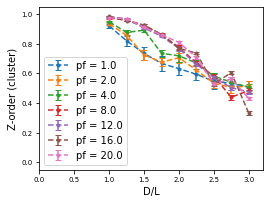

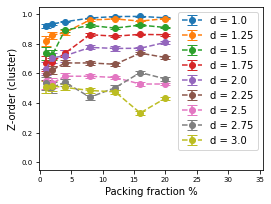

In [29]:
pf_list = df.packing_fraction.unique()
d_list = df.confining_diameter.unique()

# Confining diameter (Cluster)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(pf_list)):
    # Get sims with just these packing fractions
    df1 = df[ df['packing_fraction'] == pf_list[idx] ]
    lab = 'pf = {0}'.format( df1.packing_fraction.tolist()[0] )
    ax.errorbar(df1.confining_diameter, df1.z_order, yerr=df1.z_order_err, ls='--', 
                marker='o', markersize=3, capsize=3, capthick=1, label=lab)

ax.set_xlabel('D/L')
ax.set_ylabel('Z-order (cluster)')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[-0, 3.2])
plt.savefig(os.path.join(savepath, "Zorder_vs_diameter.pdf"))

# Packing fraction (Cluster)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(d_list)):
    
    # Get sims with just these confining diameters
    df1 = df[ df['confining_diameter'] == d_list[idx] ]
    lab = 'd = {0}'.format( df1.confining_diameter.tolist()[0] )
    ax.errorbar(df1.packing_fraction, df1.z_order, yerr=df1.z_order_err, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('Packing fraction %')
ax.set_ylabel('Z-order (cluster)')
plt.legend(loc=1)
ax.set(ylim=[-0.05,1.05], xlim=[-0.05, 35.5])
plt.savefig(os.path.join(savepath, "Zorder_vs_pf.pdf"))


### Old:

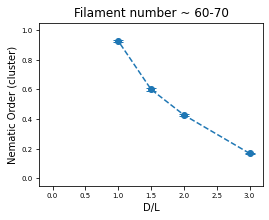

In [127]:
# Sims with n_filaments ~ 60-70
pf_list = [2.0, 4.0, 8.0, 16.0]
d_list = [3.0, 2.0, 1.5, 1.0]

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

Stemp = []
Serrtemp = []
# Get sims with just these confining diameters
for idx in range( len(d_list)):
    df1 = df[ (df.packing_fraction == pf_list[idx]) & (df.confining_diameter == d_list[idx] )]
    Stemp.append( df1.S.tolist()[0])
    Serrtemp.append( df1.Serr.tolist()[0])
    
ax.errorbar(d_list, Stemp, yerr=Serrtemp, ls='--', 
            marker='o', capsize=5, capthick=1)

ax.set_xlabel('D/L')
ax.set_ylabel('Nematic Order (cluster)')
ax.set(ylim=[-0.05,1.05], xlim=[-0.2, 3.2])
ax.set(title='Filament number ~ 60-70')
plt.savefig(os.path.join(savepath, "S_diameter_n60.pdf"))